In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpl

In [2]:
data = yf.download('ITC.NS')

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,5.550000,5.600000,5.533333,5.583333,3.303553,985500
1996-01-02,5.466666,5.566666,5.288888,5.372222,3.178642,7470000
1996-01-03,5.133333,5.254444,5.101111,5.200000,3.076742,15160500
1996-01-04,5.200000,5.332222,5.144444,5.297777,3.134595,12397500
1996-01-05,5.297777,5.277777,5.188888,5.202222,3.078057,5008500
...,...,...,...,...,...,...
2023-07-03,451.600006,465.950012,450.049988,463.250000,463.250000,10699143
2023-07-04,465.000000,468.000000,459.799988,466.350006,466.350006,7725081
2023-07-05,466.350006,480.649994,464.299988,475.100006,475.100006,16252992


In [4]:
data['20_sma'] = data.Close.rolling(window=20, min_periods=1).mean()
data['50_sma'] = data.Close.rolling(window=50, min_periods=1).mean()
data['200_sma'] = data.Close.rolling(window=200, min_periods=1).mean()

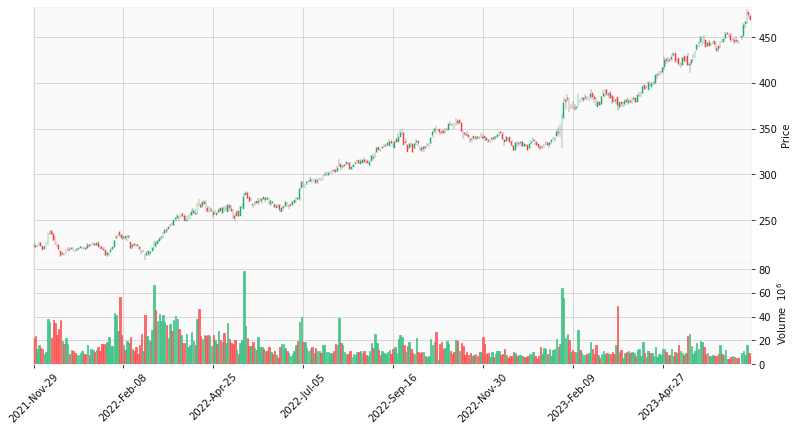

In [5]:
mpl.plot(data[-400:], figratio=(20,10), type='candle', volume=True, tight_layout=True, style='yahoo')

<AxesSubplot: xlabel='Date'>

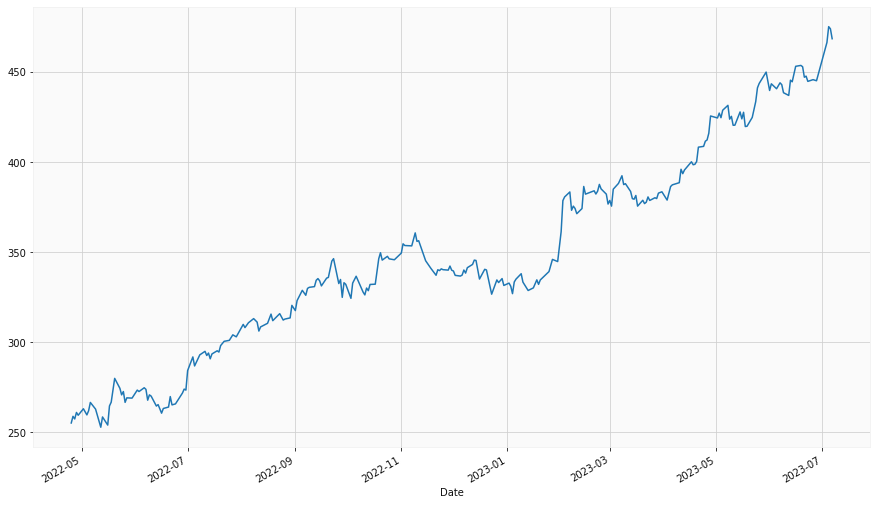

In [6]:
data[-300:].Close.plot(figsize=(15,9))

<function matplotlib.pyplot.show(close=None, block=None)>

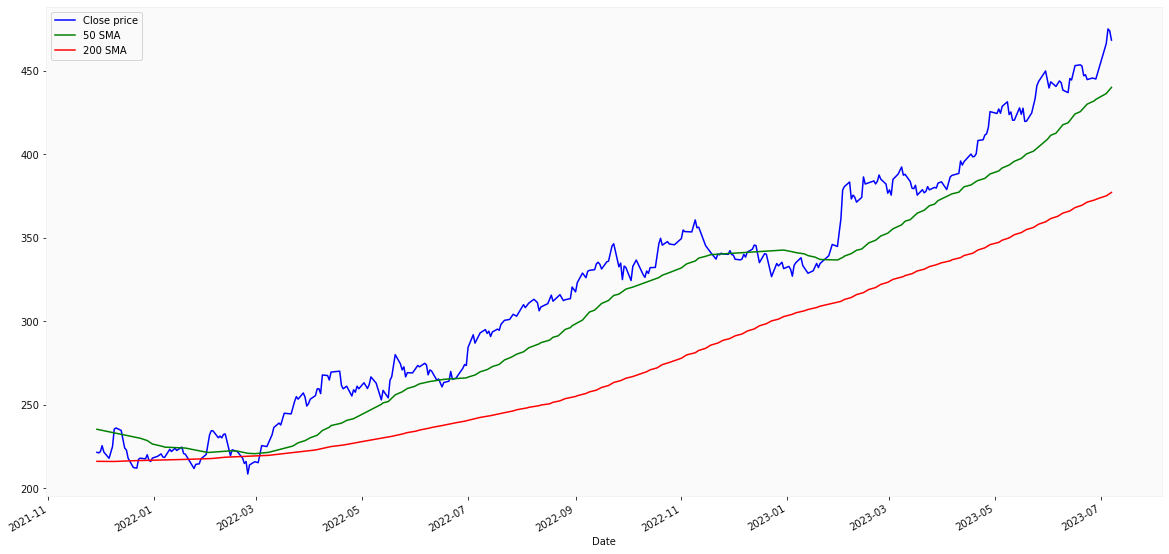

In [7]:
plt.figure(figsize=(20,10))
data.iloc[-400:]['Close'].plot(color='b', label='Close price')
data.iloc[-400:]['50_sma'].plot(color='g', label='50 SMA')
data.iloc[-400:]['200_sma'].plot(color='r', label='200 SMA')
plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

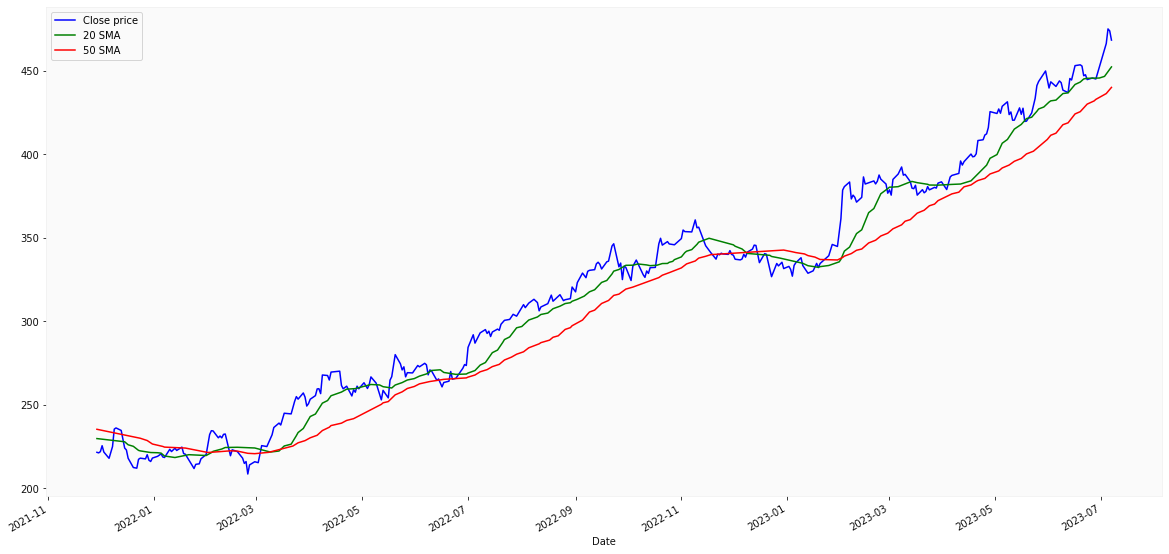

In [8]:
plt.figure(figsize=(20,10))
data.iloc[-400:]['Close'].plot(color='b', label='Close price')
data.iloc[-400:]['20_sma'].plot(color='g', label='20 SMA')
data.iloc[-400:]['50_sma'].plot(color='r', label='50 SMA')
plt.grid()
plt.legend()
plt.show

In [9]:
data['Signal'] = 0
data['Signal'] = np.where(data['20_sma'] > data['50_sma'], 1, 0)
data['Position'] = data.Signal.diff()

In [10]:
import cv2
import numpy as np

lower = np.array([0, 100, 20])
upper = np.array([35, 255, 255])

lower_1 = np.array([50, 100, 20])
upper_1 = np.array([70, 255, 255])

img = cv2.imread('bar.jpg')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_1 = cv2.inRange(img_hsv, lower, upper)
mask_2 = cv2.inRange(img_hsv, lower_1, upper_1)

mask = mask_1 + mask_2
res = cv2.bitwise_and(img, img, mask = mask)

# cv2.imshow("mask", mask)
cv2.imshow('res', res)

# plt.imshow(mask)
# plt.imshow(res)

cv2.waitKey(1)

-1

In [45]:
def crossover(name, time_zone):
    
    name = name.upper()
    time_zone = time_zone.upper()
    
    #downloading the stock price history
    price_data = yf.download(name+'.NS')
    
    #calculating the moving averages
    if time_zone == 'LONG':
        price_data['50_sma'] = price_data.Close.rolling(window=50, min_periods=1).mean()
        price_data['200_sma'] = price_data.Close.rolling(window=200, min_periods=1).mean()
        
        #calling position function
        position(price_data, '50_sma', '200_sma')
        
        #plotting graph
        plot_graph(price_data, '50_sma', '200_sma')
        
    elif time_zone == 'SHORT':
        price_data['20_sma'] = price_data.Close.rolling(window=20, min_periods=1).mean()
        price_data['50_sma'] = price_data.Close.rolling(window=50, min_periods=1).mean()
        
        #calling position function
        position(price_data, '20_sma', '50_sma')
        
        #plotting graph
        plot_graph(price_data, '20_sma', '50_sma')
   
    
def position(price_data, short_trend, long_trend):
    price_data['Signal'] = 0
    price_data['Signal'] = np.where(price_data[short_trend] > price_data[long_trend], 1, 0)
    
    #finding the intersecting points of both moving averages
    price_data['Position'] = price_data.Signal.diff()
    

def plot_graph(price_data, short_trend, long_trend):
    #plotting the close price and moving averages

    plt.figure(figsize=(16,10))
    plt.xlabel('Year')
    plt.ylabel('Price')
    price_data.iloc[-800:-135]['Close'].plot(color='b', label='Close price')
    price_data.iloc[-800:-135][short_trend].plot(color='g', label=short_trend)
    price_data.iloc[-800:-135][long_trend].plot(color='r', label=long_trend)
    
#     #marking the buy label
    plt.plot(price_data.iloc[-800:-135][price_data.iloc[-800:-135]['Position'] == 1].index,
             price_data.iloc[-800:-135][short_trend][price_data.iloc[-800:-135]['Position'] == 1],
             '^', markersize = 15, color='g', label='buy')

    #marking the sell label
    plt.plot(price_data.iloc[-800:-135][price_data.iloc[-800:-135]['Position'] == -1].index,
             price_data.iloc[-800:-135][short_trend][price_data.iloc[-800:-135]['Position'] == -1],
             'v', markersize = 15, color='r', label='sell')
    
    plt.grid()
    plt.legend()
    plt.show
    plt.savefig('bar.jpg')


[*********************100%***********************]  1 of 1 completed


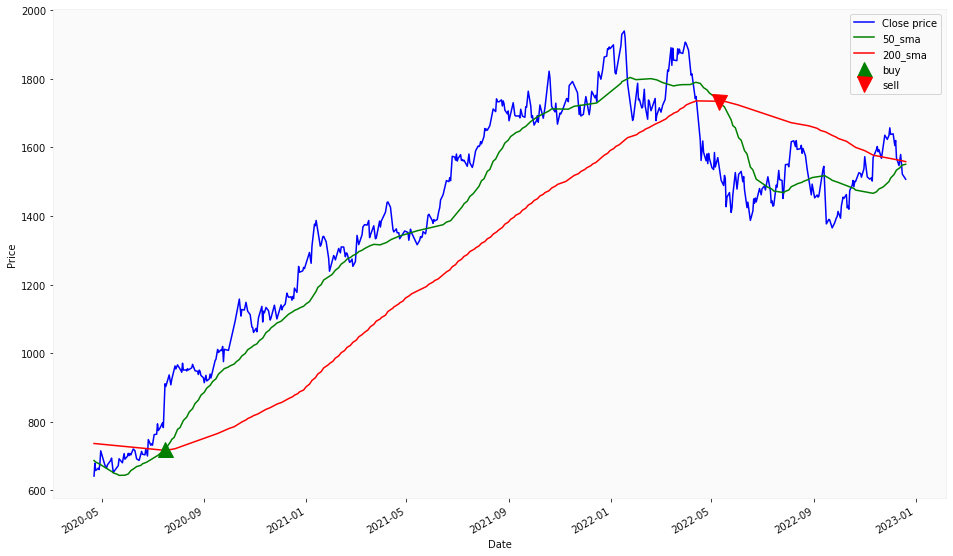

In [46]:
crossover('infy', 'long')

[*********************100%***********************]  1 of 1 completed


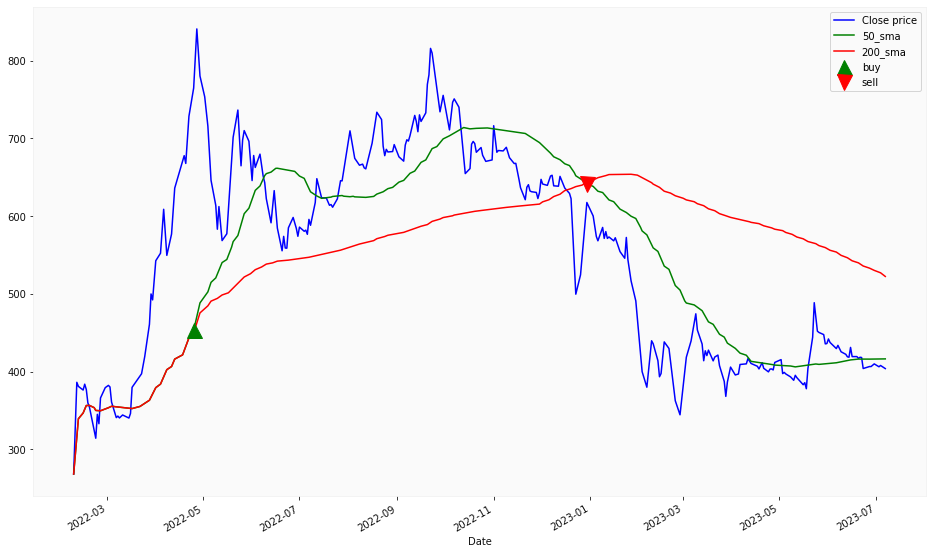

In [13]:
import cv2
import numpy as np

lower = np.array([0, 100, 20])
upper = np.array([35, 255, 255])

lower_1 = np.array([50, 100, 20])
upper_1 = np.array([70, 255, 255])

img = cv2.imread('bar.jpg')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_1 = cv2.inRange(img_hsv, lower, upper)
mask_2 = cv2.inRange(img_hsv, lower_1, upper_1)

mask = mask_1 + mask_2
res = cv2.bitwise_and(img, img, mask = mask)

# cv2.imshow("mask", mask)
cv2.imshow('res', res)

# plt.imshow(mask)
# plt.imshow(res)

cv2.waitKey()
cv2.destoyAllWindows()